In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing.transactionencoder import TransactionEncoder
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import csv
import pickle
import os

plt.rcParams["font.sans-serif"]=["SimHei"]
plt.rcParams["axes.unicode_minus"]=False

In [2]:
os.chdir(r'C:\Users\Simmons\PycharmProjects\ARM')
with open(r'./fundStocks.pkl', 'rb') as f:
    transactions = list(pickle.load(f).values())

In [3]:
te = TransactionEncoder()
transactions_df = te.fit_transform(transactions)
transactions_df = pd.DataFrame(transactions_df, columns=te.columns_)

<AxesSubplot:>

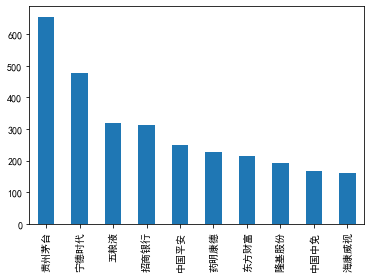

In [4]:
transactions_df.sum().sort_values(ascending=False).head(10).plot.bar()

In [5]:
frequent_itemsets = apriori(transactions_df, min_support=0.01, use_colnames=True)

<AxesSubplot:xlabel='support', ylabel='lift'>

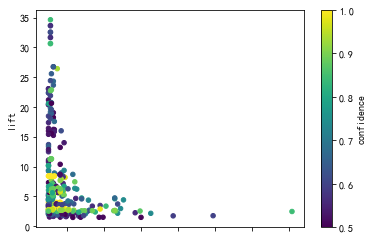

In [6]:
ar = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)
ar[['support', 'confidence', 'lift']].plot.scatter(x='support', y='lift', c='confidence', colormap='viridis')

In [7]:
ar = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.8)
ar = ar.query("support >= 0.02 and lift >= 2").sort_values(by='lift', ascending=False)

In [9]:
ar[['antecedents', 'consequents']] = ar[['antecedents', 'consequents']].applymap(lambda x: list(x))
round(ar[['antecedents', 'consequents', 'support', 'confidence', 'lift']], 3).to_csv('example3.csv', encoding='gbk')

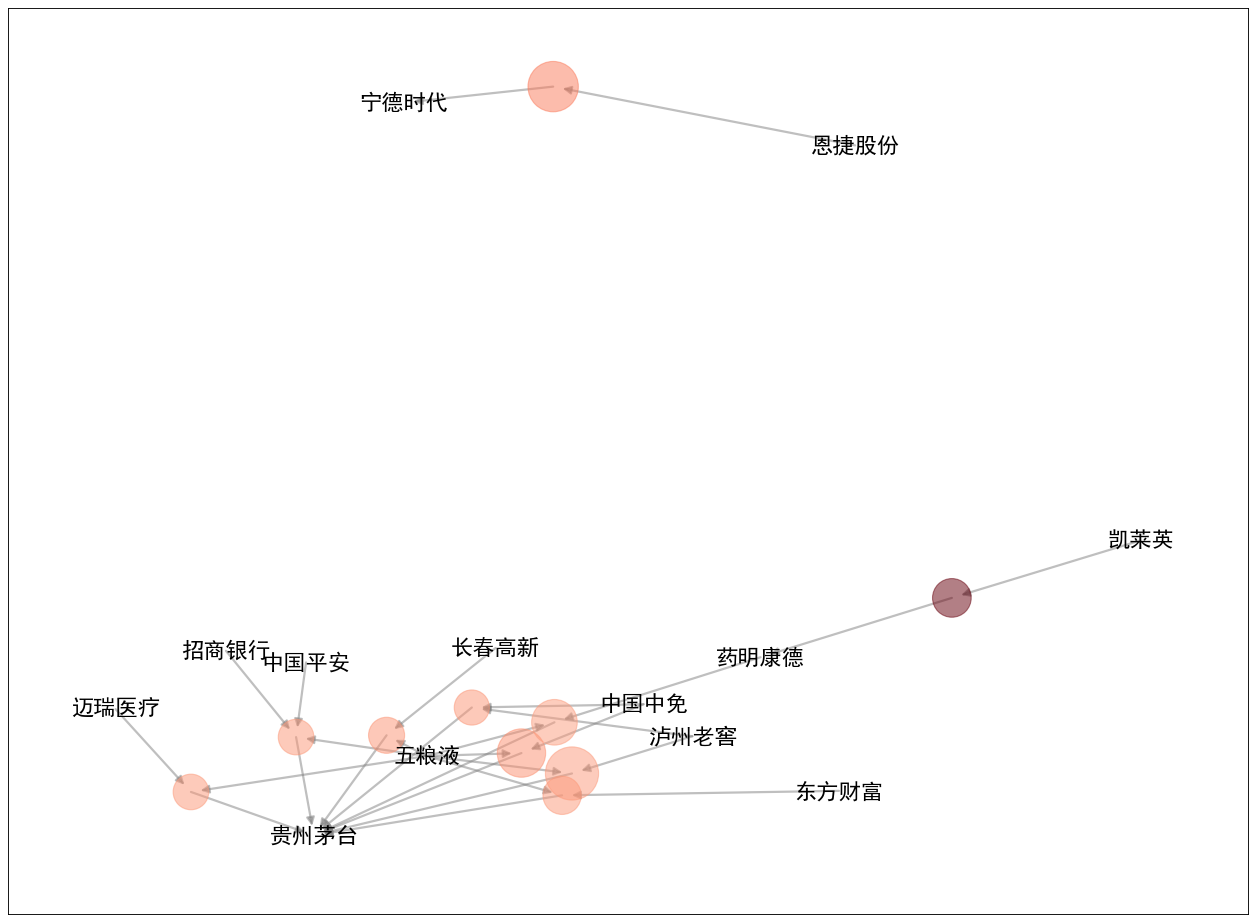

In [34]:
def drawGraph(ar, Multiplier=1000):
    G = nx.DiGraph()
    size_dict = {}
    color_dict = {}
    label_dict = {}
    for i in ar.index:
        ser = ar.loc[i]
        G.add_node(i)
        # node_list[i] = i
        size_dict[i] = ser['support'] * Multiplier
        color_dict[i] = ser['lift']
        label_dict[i] = ''
        for ant in list(ser['antecedents']):
            G.add_node(ant)
            G.add_edge(ant, i)
            size_dict[ant] = 0
            color_dict[ant] = 0
            label_dict[ant] = ant

        for j in list(ser['consequents']):
            G.add_node(j)
            size_dict[ j ] = 0
            color_dict[ j ] = 0
            label_dict[ j ] = j
            G.add_edge(i, j)

    node_list, size_list = zip(*size_dict.items())
    node_list, color_list = zip(*color_dict.items())

    pos = nx.spring_layout(G)
    cmap = plt.cm.get_cmap('Reds')
    plt.figure(figsize=(20, 15), dpi=80)
    nx.draw_networkx_nodes(G, pos=pos,
                           nodelist=node_list,
                           node_size=size_list,
                           node_color=color_list,
                           alpha=0.5, with_labels=True, cmap=cmap)
    nx.draw_networkx_edges(G,pos=pos, edge_color='grey', alpha=0.5, width=2, arrowsize=15)
    nx.draw_networkx_labels(G, pos=pos,labels=label_dict, font_size=20)
    plt.show()

drawGraph(ar.head(10), Multiplier=50000)